In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = "https://www.worldometers.info/coronavirus/"

In [3]:
resp = requests.get(url).content.decode()

In [4]:
soup = BeautifulSoup(resp,'html.parser')

In [5]:
table_data = soup.find('tbody').find_all('tr')

In [6]:
table_data

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>125,509,988</td>
 <td></td>
 <td>1,620,332</td>
 <td></td>
 <td>120,994,476</td>
 <td>+1,341</td>
 <td>2,895,180</td>
 <td>7,302</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="North America" style="display:none;">North America</td>
 <!-- 1 Case every X -->
 <td>
 </td>
 <!-- 1 Death every X -->
 <td></td>
 <!-- 1 test every X -->
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td>215,078,619</td>
 <td>+19,968</td>
 <td>1,539,998</td>
 <td>+113</td>
 <td>199,649,186</td>
 <td>+17,243</td>
 <td>13,889,435</td>
 <td>15,547</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" style="displ

In [7]:
table_data[8]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">106,082,759</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,153,526                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">103,746,998</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">1,182,235</td>
<td style="font-weight: bold; text-align:right">2,136</td>
<td style="font-weight: bold; text-align:right">316,849</td>
<td style="font-weight: bold; text-align:right">3,445</td>
<td style="font-weight: bold; text-align:right">1,171,933,667</td>
<td style="font-weight: bold; text-align:right">3,5

In [8]:
complete_data = list()
for i in range(8,len(table_data)):
    data = []
    list_data = table_data[i].find_all('td')
    for i in list_data:
        data.append(i.text)
        
    complete_data.append(data)    
    

In [9]:
complete_data[0]

['1',
 'USA',
 '106,082,759',
 '',
 '1,153,526                                ',
 '',
 '103,746,998',
 '',
 '1,182,235',
 '2,136',
 '316,849',
 '3,445',
 '1,171,933,667',
 '3,500,344',
 '334,805,269 ',
 'North America',
 '3',
 '290',
 '0',
 '',
 '',
 '3,531']

In [10]:
complete_data

[['1',
  'USA',
  '106,082,759',
  '',
  '1,153,526                                ',
  '',
  '103,746,998',
  '',
  '1,182,235',
  '2,136',
  '316,849',
  '3,445',
  '1,171,933,667',
  '3,500,344',
  '334,805,269 ',
  'North America',
  '3',
  '290',
  '0',
  '',
  '',
  '3,531'],
 ['2',
  'India',
  '44,700,667',
  '',
  '530,818                                ',
  '',
  '44,161,922',
  '',
  '7,927',
  'N/A',
  '31,779',
  '377',
  '920,637,763',
  '654,498',
  '1,406,631,776 ',
  'Asia',
  '31',
  '2,650',
  '2',
  '',
  '',
  '6'],
 ['3',
  'France',
  '39,735,279',
  '',
  '165,454                                ',
  '',
  '39,468,692',
  '',
  '101,133',
  '869',
  '605,864',
  '2,523',
  '271,490,188',
  '4,139,547',
  '65,584,518 ',
  'Europe',
  '2',
  '396',
  '0',
  '',
  '',
  '1,542'],
 ['4',
  'Germany',
  '38,326,616',
  '',
  '170,231                                ',
  '',
  '38,012,000',
  '+13,500',
  '144,385',
  'N/A',
  '456,902',
  '2,029',
  '122,332,384',
  '1

In [11]:
mapped_data = list(map(lambda x : x[1:10]+[x[12]]+[x[14]],complete_data))

In [12]:
#creating table

columns_names = ["Name",
                 "Total_cases",
                 "New cases"
                 ,"Total deaths",
                "New deaths",
                "Total Recovered",
                "New Recovered",
                "Active Cases",
                "Serious Cases",
                "Total tests",
                "Population"] 

In [13]:
mapped_data[0]

['USA',
 '106,082,759',
 '',
 '1,153,526                                ',
 '',
 '103,746,998',
 '',
 '1,182,235',
 '2,136',
 '1,171,933,667',
 '334,805,269 ']

In [14]:
mapped_data

[['USA',
  '106,082,759',
  '',
  '1,153,526                                ',
  '',
  '103,746,998',
  '',
  '1,182,235',
  '2,136',
  '1,171,933,667',
  '334,805,269 '],
 ['India',
  '44,700,667',
  '',
  '530,818                                ',
  '',
  '44,161,922',
  '',
  '7,927',
  'N/A',
  '920,637,763',
  '1,406,631,776 '],
 ['France',
  '39,735,279',
  '',
  '165,454                                ',
  '',
  '39,468,692',
  '',
  '101,133',
  '869',
  '271,490,188',
  '65,584,518 '],
 ['Germany',
  '38,326,616',
  '',
  '170,231                                ',
  '',
  '38,012,000',
  '+13,500',
  '144,385',
  'N/A',
  '122,332,384',
  '83,883,596 '],
 ['Brazil',
  '37,204,677',
  '',
  '699,917                                ',
  '',
  '36,249,161',
  '',
  '255,599',
  'N/A',
  '63,776,166',
  '215,353,593 '],
 ['Japan',
  '33,407,175',
  '+8,639',
  '73,681                                ',
  '+49',
  '21,713,301',
  '+855',
  '11,620,193',
  '68',
  '97,138,607',
  '125

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame(mapped_data,columns = columns_names)
df.to_csv("covid_data.csv",index = False)

In [17]:
df.head()

,Name,Total_cases,New cases,Total deaths,New deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total tests,Population
0,USA,"106,082,759",,"1,153,526",,"103,746,998",,"1,182,235","2,136","1,171,933,667","334,805,269"
1,India,"44,700,667",,"530,818",,"44,161,922",,"7,927",N/A,"920,637,763","1,406,631,776"
2,France,"39,735,279",,"165,454",,"39,468,692",,"101,133",869,"271,490,188","65,584,518"
3,Germany,"38,326,616",,"170,231",,"38,012,000","+13,500","144,385",N/A,"122,332,384","83,883,596"
4,Brazil,"37,204,677",,"699,917",,"36,249,161",,"255,599",N/A,"63,776,166","215,353,593"


In [18]:
df.tail()

,Name,Total_cases,New cases,Total deaths,New deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total tests,Population
226,Vatican City,29,,,,29,,0,,,799
227,Western Sahara,10,,1,,9,,0,,,"626,161"
228,MS Zaandam,9,,2,,7,,0,,,
229,Tokelau,5,,,,,,5,,,"1,378"
230,China,"503,302",,"5,272",,"379,053",,"118,977",N/A,"160,000,000","1,448,471,400"


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
df = pd.read_csv("covid_data.csv",na_values = ['',' ','  '])

In [21]:
df.head()

,Name,Total_cases,New cases,Total deaths,New deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total tests,Population
0,USA,"106,082,759",NaN,"1,153,526",NaN,"103,746,998",NaN,"1,182,235","2,136","1,171,933,667","334,805,269"
1,India,"44,700,667",NaN,"530,818",NaN,"44,161,922",NaN,"7,927",NaN,"920,637,763","1,406,631,776"
2,France,"39,735,279",NaN,"165,454",NaN,"39,468,692",NaN,"101,133",869,"271,490,188","65,584,518"
3,Germany,"38,326,616",NaN,"170,231",NaN,"38,012,000","+13,500","144,385",NaN,"122,332,384","83,883,596"
4,Brazil,"37,204,677",NaN,"699,917",NaN,"36,249,161",NaN,"255,599",NaN,"63,776,166","215,353,593"


In [22]:
df.shape

(231, 11)

In [23]:
df.isna()

,Name,Total_cases,New cases,Total deaths,New deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total tests,Population
0,False,False,True,False,True,False,True,False,False,False,False
1,False,False,True,False,True,False,True,False,True,False,False
2,False,False,True,False,True,False,True,False,False,False,False
3,False,False,True,False,True,False,False,False,True,False,False
4,False,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
226,False,False,True,True,True,False,True,False,True,True,False
227,False,False,True,False,True,False,True,False,True,True,False
228,False,False,True,False,True,False,True,False,True,True,True
229,False,False,True,True,True,True,True,False,True,True,False


In [24]:
df.isnull().sum() #how many missing rows in each column

Name                 0
Total_cases          0
New cases          207
Total deaths         6
New deaths         216
Total Recovered     21
New Recovered      206
Active Cases        19
Serious Cases      105
Total tests         18
Population           2
dtype: int64

In [25]:
df.isnull().sum    

#This attribute is a function that computes the sum of all the boolean values in the DataFrame, treating True as 1 and False as 0.

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Name  Total_cases  New cases  Total deaths  New deaths  Total Recovered  \
0    False        False       True         False        True            False   
1    False        False       True         False        True            False   
2    False        False       True         False        True            False   
3    False        False       True         False        True            False   
4    False        False       True         False        True            False   
..     ...          ...        ...           ...         ...              ...   
226  False        False       True          True        True            False   
227  False        False       True         False        True            False   
228  False        False       True         False        True            False   
229  False        False       True          True        True             True   
230  False        False       True         Fals

In [26]:
pd.read_csv("covid_data.csv")

,Name,Total_cases,New cases,Total deaths,New deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total tests,Population
0,USA,"106,082,759",NaN,"1,153,526",NaN,"103,746,998",NaN,"1,182,235","2,136","1,171,933,667","334,805,269"
1,India,"44,700,667",NaN,"530,818",NaN,"44,161,922",NaN,"7,927",NaN,"920,637,763","1,406,631,776"
2,France,"39,735,279",NaN,"165,454",NaN,"39,468,692",NaN,"101,133",869,"271,490,188","65,584,518"
3,Germany,"38,326,616",NaN,"170,231",NaN,"38,012,000","+13,500","144,385",NaN,"122,332,384","83,883,596"
4,Brazil,"37,204,677",NaN,"699,917",NaN,"36,249,161",NaN,"255,599",NaN,"63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...,...,...,...
226,Vatican City,29,NaN,,NaN,29,NaN,0,NaN,NaN,799
227,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,NaN,"626,161"
228,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,
229,Tokelau,5,NaN,,NaN,NaN,NaN,5,NaN,NaN,"1,378"


In [27]:
# To display chart 

<Axes: >

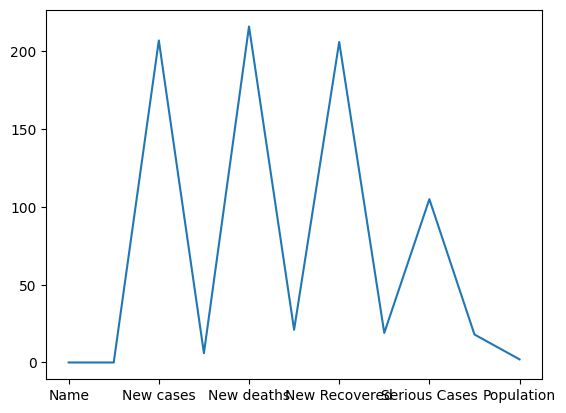

In [28]:
#line chart
df.isna().sum().plot()

<Axes: >

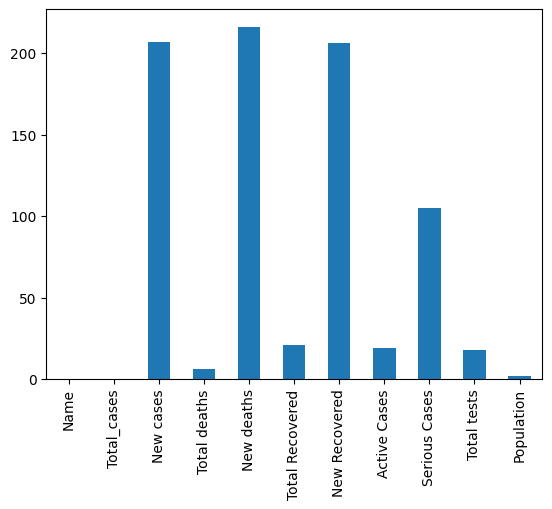

In [29]:
#bar chart
df.isna().sum().plot.bar()

<Axes: >

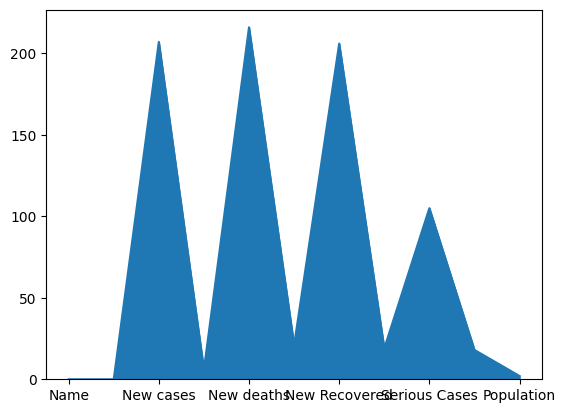

In [30]:
#Area chart

df.isna().sum().plot.area()

<Axes: >

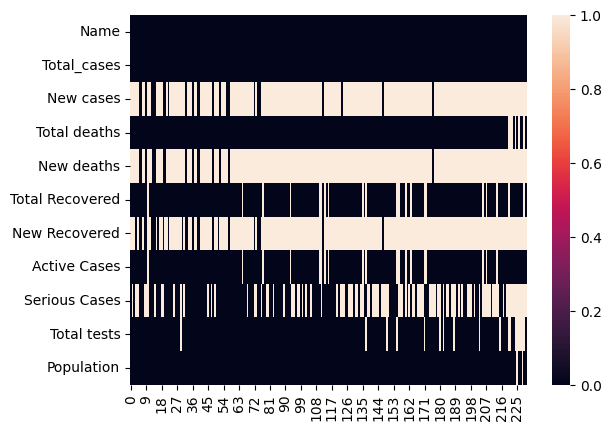

In [31]:
import seaborn as sns
sns.heatmap(df.isna().transpose())